In [1]:
import pandas as pd
import numpy as np
import gwaslab as gl

# download sample data from jenger

In [2]:

!wget -O AF_bbj.txt.gz http://jenger.riken.jp/1/

--2022-03-28 22:44:47--  http://jenger.riken.jp/1/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125126996 (119M) [text/plain]
Saving to: ‘AF_bbj.txt.gz’

AF_bbj.txt.gz       100%[===================>] 119.33M  8.69MB/s    in 13s     

2022-03-28 22:45:01 (8.84 MB/s) - ‘AF_bbj.txt.gz’ saved [125126996/125126996]



# load gwas sumstats to a gwaslab Sumstats object

In [3]:
AF = gl.Sumstats("./AF_bbj.txt.gz",
                   snpid="SNP",
                   eaf="FREQ1",
                   chrom="CHR",
                   pos="POS",
                   ea="A1",
                   nea="A2",
                   n=12121,
                   p="PVALUE",
                   beta="EFFECT1",
                   se="STDERR",
                   other=["WALDCHISQ"])

Initiating from file :./AF_bbj.txt.gz
  - Reading columns          : SNP,CHR,POS,A1,A2,FREQ1,EFFECT1,STDERR,PVALUE,WALDCHISQ
  - Renaming columns to      : MARKERNAME,CHR,POS,EA,NEA,EAF,BETA,SE,P,WALDCHISQ
  - Datatype of each columns : string,string,int,string,string,float,float,float,float,string
  - Current dataframe shape  : Rows  5018048  x  10  Columns
  - Reordering columns to    : MARKERNAME,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,WALDCHISQ
Loading data finished successfully!


# .data stores the preformated dataset

In [4]:
AF.data

,MARKERNAME,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,WALDCHISQ
0,rs143225517,1,751756,T,C,0.8483,0.030,0.030,0.3218,12121,0.9818
1,rs3094315,1,752566,A,G,0.8438,0.029,0.029,0.3217,12121,0.9821
2,rs4475691,1,846808,C,T,0.8589,-0.022,0.030,0.4644,12121,0.5352
3,rs950122,1,846864,G,C,0.8589,-0.022,0.030,0.4642,12121,0.5358
4,rs3905286,1,847228,C,T,0.8609,-0.021,0.031,0.4953,12121,0.4649
...,...,...,...,...,...,...,...,...,...,...,...
5018043,rs2301584,22,51171497,G,A,0.7504,0.008,0.025,0.7577,12121,0.0952
5018044,rs41281537,22,51171667,G,A,0.9090,0.020,0.038,0.6003,12121,0.2746
5018045,rs756638,22,51171693,G,A,0.8871,0.038,0.034,0.2643,12121,1.2459
5018046,rs3810648,22,51175626,A,G,0.9896,0.101,0.101,0.3209,12121,0.9852


# create manhattan plot and qq plot

Basic settings:
  - Genome-wide significance level is set to 5e-08 ...
  - Raw input contains 5018048 variants...
  - Ploy layout mode is : mqq
Start conversion and QC:
  - P values are being converted to -log10(P)...
  - Sanity check: 0 variants with P value outside of (0,1] will be removed...
  - Sanity check: 0 na/inf/-inf variants will be removed...
  - Maximum -log10(P) values is 134.014573525917 .
Plotting 5018048 variants:
  - Found 14 significant variants with a sliding window size of 500 kb...
  - Skip annotating
  - Created Manhattan plot successfully!
  - Created QQ plot successfully!


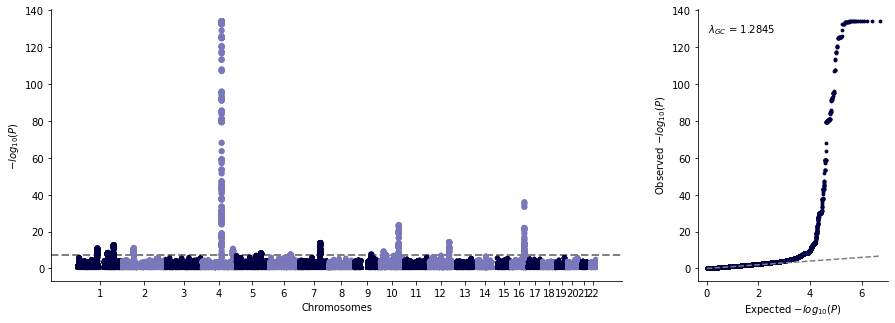

In [5]:
myplot = AF.plot_mqq()

# scale at a certain threshold

Basic settings:
  - Genome-wide significance level is set to 5e-08 ...
  - Raw input contains 5018048 variants...
  - Ploy layout mode is : mqq
Start conversion and QC:
  - P values are being converted to -log10(P)...
  - Sanity check: 0 variants with P value outside of (0,1] will be removed...
  - Sanity check: 0 na/inf/-inf variants will be removed...
  - Maximum -log10(P) values is 134.014573525917 .
  - Minus log10(P) values above 20 will be shrunk with a shrinkage factor of 10...
Plotting 5018048 variants:
  - Found 14 significant variants with a sliding window size of 500 kb...
  - Skip annotating
  - Created Manhattan plot successfully!
  - Created QQ plot successfully!


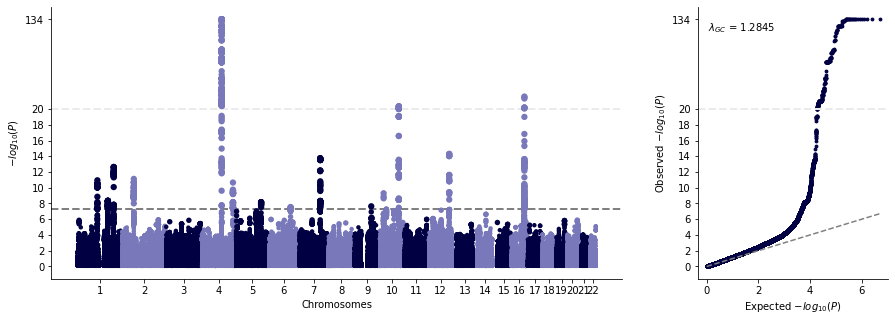

In [6]:
myplot = AF.plot_mqq(cut=20)

# annotate lead SNPs

Basic settings:
  - Genome-wide significance level is set to 5e-08 ...
  - Raw input contains 5018048 variants...
  - Ploy layout mode is : mqq
Start conversion and QC:
  - P values are being converted to -log10(P)...
  - Sanity check: 0 variants with P value outside of (0,1] will be removed...
  - Sanity check: 0 na/inf/-inf variants will be removed...
  - Maximum -log10(P) values is 134.014573525917 .
  - Minus log10(P) values above 20 will be shrunk with a shrinkage factor of 10...
Plotting 5018048 variants:
  - Found 14 significant variants with a sliding window size of 500 kb...
  - Annotating using column CHR:POS...
  - Created Manhattan plot successfully!
  - Created QQ plot successfully!


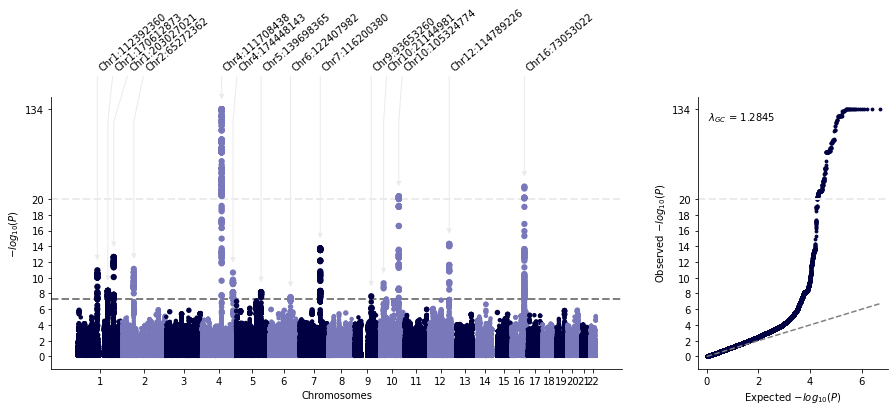

In [7]:
myplot = AF.plot_mqq(cut=20,anno=True)

# change colors

Basic settings:
  - Genome-wide significance level is set to 5e-08 ...
  - Raw input contains 5018048 variants...
  - Ploy layout mode is : mqq
Start conversion and QC:
  - P values are being converted to -log10(P)...
  - Sanity check: 0 variants with P value outside of (0,1] will be removed...
  - Sanity check: 0 na/inf/-inf variants will be removed...
  - Maximum -log10(P) values is 134.014573525917 .
  - Minus log10(P) values above 20 will be shrunk with a shrinkage factor of 10...
Plotting 5018048 variants:
  - Found 14 significant variants with a sliding window size of 500 kb...
  - Annotating using column CHR:POS...
  - Created Manhattan plot successfully!
  - Created QQ plot successfully!


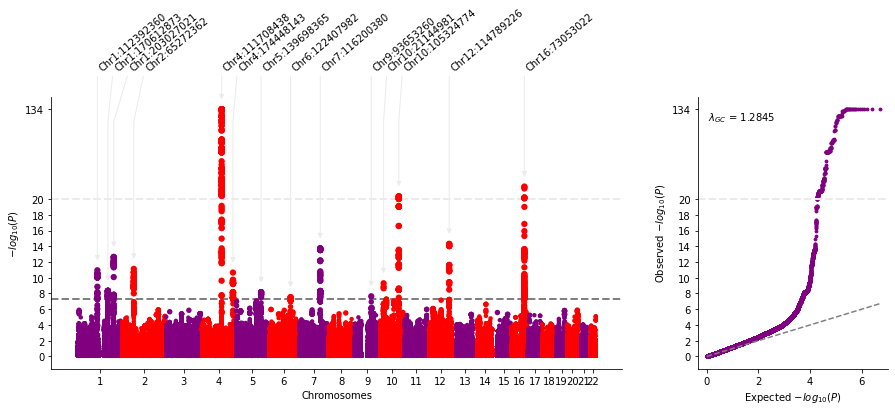

In [8]:
myplot = AF.plot_mqq(cut=20,anno=True,colors=["purple","red"]) 

# Highlight loci and stratified QQ plot

Basic settings:
  - Genome-wide significance level is set to 5e-08 ...
  - Raw input contains 5018048 variants...
  - Ploy layout mode is : mqq
Start conversion and QC:
  - P values are being converted to -log10(P)...
  - Sanity check: 0 variants with P value outside of (0,1] will be removed...
  - Sanity check: 0 na/inf/-inf variants will be removed...
  - Maximum -log10(P) values is 134.014573525917 .
  - Minus log10(P) values above 20 will be shrunk with a shrinkage factor of 10...
Plotting 5018048 variants:
  - Loci to highlight : ['rs7434417', 'rs12044963']
  - Highlight range +- : 500  kb
  - Found 14 significant variants with a sliding window size of 500 kb...
  - Annotating using column CHR:POS...
  - Created Manhattan plot successfully!
  - Created QQ plot successfully!


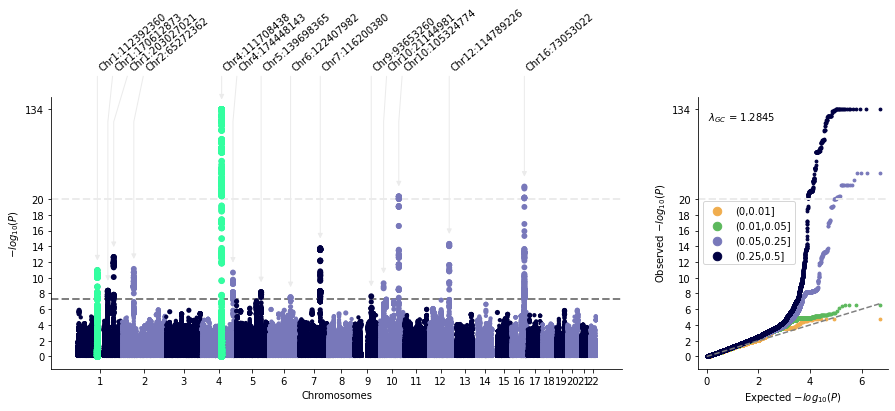

In [9]:
myplot = AF.plot_mqq(
        snpid="MARKERNAME",
        mode="mqq",
        stratified=True,
        eaf="EAF",
        anno=True,
        cut=20,
        highlight=["rs7434417","rs12044963"], #the lead SNPs to highlight
        highlight_color="#33FFA0", 
        maf_bin_colors = ["#f0ad4e","#5cb85c", "#7878BA","#000042"])

# convert data

In [10]:
AF.fill_data(to_fill=["MLOG10P","BETA","OR"])

Strat filling data using existing columns...
  - Raw input columns:  ['MARKERNAME', 'CHR', 'POS', 'EA', 'NEA', 'EAF', 'BETA', 'SE', 'P', 'N', 'WALDCHISQ']
  - Overwirte mode:  False
  - Skipping columns:  ['BETA']
Filling columns:  ['MLOG10P', 'OR']
  - Filling OR using BETA column...
  - Filling OR_95L/OR_95U using BETA/SE columns...
  - Filling MLOG10P using P column...


In [11]:
AF.data

,MARKERNAME,CHR,POS,EA,NEA,EAF,N,BETA,SE,P,MLOG10P,OR,OR_95L,OR_95U,WALDCHISQ
0,rs143225517,1,751756,T,C,0.8483,12121,0.030,0.030,0.3218,0.492414,1.030455,0.971612,1.092861,0.9818
1,rs3094315,1,752566,A,G,0.8438,12121,0.029,0.029,0.3217,0.492549,1.029425,0.972545,1.089631,0.9821
2,rs4475691,1,846808,C,T,0.8589,12121,-0.022,0.030,0.4644,0.333108,0.978240,0.922379,1.037484,0.5352
3,rs950122,1,846864,G,C,0.8589,12121,-0.022,0.030,0.4642,0.333295,0.978240,0.922379,1.037484,0.5358
4,rs3905286,1,847228,C,T,0.8609,12121,-0.021,0.031,0.4953,0.305132,0.979219,0.921494,1.040560,0.4649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018043,rs2301584,22,51171497,G,A,0.7504,12121,0.008,0.025,0.7577,0.120503,1.008032,0.959830,1.058655,0.0952
5018044,rs41281537,22,51171667,G,A,0.9090,12121,0.020,0.038,0.6003,0.221632,1.020201,0.946979,1.099086,0.2746
5018045,rs756638,22,51171693,G,A,0.8871,12121,0.038,0.034,0.2643,0.577903,1.038731,0.971767,1.110309,1.2459
5018046,rs3810648,22,51175626,A,G,0.9896,12121,0.101,0.101,0.3209,0.493630,1.106277,0.907596,1.348451,0.9852


# calculated per SNP heritability

In [12]:
AF.get_per_snp_h2()

Calculating per-SNP heritibility by 2 * BETA * AF * (1-AF)...


In [13]:
AF.data

,MARKERNAME,CHR,POS,EA,NEA,EAF,N,BETA,SE,P,MLOG10P,OR,OR_95L,OR_95U,WALDCHISQ,PerSNPh2
0,rs143225517,1,751756,T,C,0.8483,12121,0.030,0.030,0.3218,0.492414,1.030455,0.971612,1.092861,0.9818,0.00023
1,rs3094315,1,752566,A,G,0.8438,12121,0.029,0.029,0.3217,0.492549,1.029425,0.972545,1.089631,0.9821,0.00022
2,rs4475691,1,846808,C,T,0.8589,12121,-0.022,0.030,0.4644,0.333108,0.978240,0.922379,1.037484,0.5352,0.00012
3,rs950122,1,846864,G,C,0.8589,12121,-0.022,0.030,0.4642,0.333295,0.978240,0.922379,1.037484,0.5358,0.00012
4,rs3905286,1,847228,C,T,0.8609,12121,-0.021,0.031,0.4953,0.305132,0.979219,0.921494,1.040560,0.4649,0.00011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018043,rs2301584,22,51171497,G,A,0.7504,12121,0.008,0.025,0.7577,0.120503,1.008032,0.959830,1.058655,0.0952,0.00002
5018044,rs41281537,22,51171667,G,A,0.9090,12121,0.020,0.038,0.6003,0.221632,1.020201,0.946979,1.099086,0.2746,0.00007
5018045,rs756638,22,51171693,G,A,0.8871,12121,0.038,0.034,0.2643,0.577903,1.038731,0.971767,1.110309,1.2459,0.00029
5018046,rs3810648,22,51175626,A,G,0.9896,12121,0.101,0.101,0.3209,0.493630,1.106277,0.907596,1.348451,0.9852,0.00021


# extract lead SNPs

In [14]:
AF.get_lead().data

Start extracting lead variants...
  - Processing 5018048 variants...
  - Found 1064 significant variants with a sliding window size of 500 kb...
  - Identified 14 lead variants successfully!


,MARKERNAME,CHR,POS,EA,NEA,EAF,BETA,SE,P,MLOG10P,OR,OR_95L,OR_95U,N,WALDCHISQ,PerSNPh2
195876,rs12044963,1,112392360,G,T,0.5016,-0.146,0.021,1.130000e-11,10.946922,0.864158,0.829312,0.900468,12121,46.0896,0.01066
249520,rs639652,1,170612873,G,A,0.5401,0.126,0.022,4.430000e-09,8.353596,1.134282,1.086412,1.184261,12121,34.423,0.00789
308252,rs10920555,1,203027021,G,A,0.7971,0.200,0.027,2.290000e-13,12.640165,1.221403,1.158448,1.287779,12121,53.7417,0.01294
526691,rs2540953,2,65272362,G,A,0.6502,0.159,0.023,7.450000e-12,11.127844,1.172338,1.120663,1.226395,12121,46.9058,0.0115
1401116,rs7434417,4,111708438,A,G,0.5458,-0.536,0.022,9.670000e-135,134.014574,0.585084,0.560392,0.610864,12121,610.2915,0.14244
1521151,rs10024737,4,174448143,T,C,0.9252,-0.271,0.041,2.180000e-11,10.661544,0.762616,0.703731,0.826429,12121,44.8023,0.01016
1810847,rs72798854,5,139698365,G,A,0.6566,-0.131,0.023,6.700000e-09,8.173925,0.877218,0.838552,0.917667,12121,33.6192,0.00774
2126909,rs6928224,6,122407982,C,T,0.6904,0.135,0.024,2.840000e-08,7.546682,1.144537,1.091945,1.199661,12121,30.8169,0.00779
2437455,rs1049334,7,116200380,G,A,0.7136,0.185,0.024,1.830000e-14,13.737549,1.203218,1.147931,1.261169,12121,58.7082,0.01399
2924818,rs1675334,9,93653260,C,G,0.7090,-0.132,0.024,2.270000e-08,7.643974,0.876341,0.836073,0.918548,12121,31.2521,0.00719


# calculated GC

In [15]:
AF.get_gc()

(p mode) Lambda GC at 0.5 is   1.28453


1.2845345411776243